In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("wine.csv")
data

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
X = data.drop("Wine", axis = 1)
y = data['Wine']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [5]:
np.random.seed(123)
x1 = np.random.randn(X_train.shape[0]).reshape(-1, 1)
x2 = np.random.randn(X_test.shape[0]).reshape(-1, 1)

In [9]:
X_train_combined = np.hstack((X_train, x1))
X_test_combined = np.hstack((X_test, x2))
X_test_combined.shape

(54, 14)

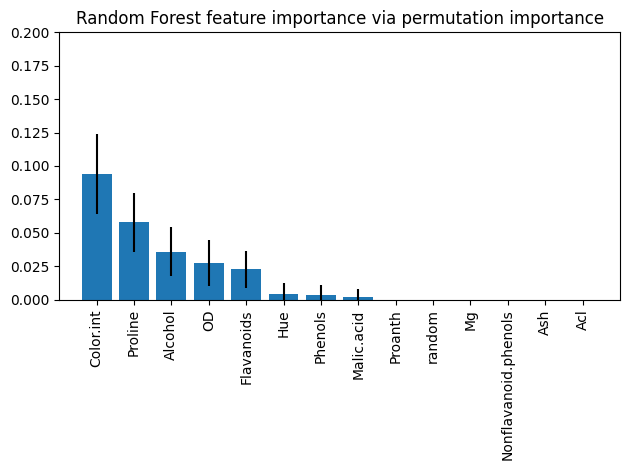

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_train_combined, y_train)

result = permutation_importance(
    estimator=forest,
    X=X_test_combined,
    y=y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=0
)


indices = np.argsort(result['importances_mean'])[::-1]

plt.figure()
plt.title("Permutation importance")
plt.bar(
    range(X_train_combined.shape[1]),
    result['importances_mean'][indices],
    yerr=result['importances_std'][indices]
)

feature_names = np.array(list(data.columns[1:])+['random'])
plt.xticks(range(X_train_combined.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train_combined.shape[1]])
plt.ylim([0, 0.2])

plt.tight_layout()
plt.show()

In [18]:
y_pred = forest.predict(X_test_combined)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1.0